# Description

At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

In [1]:
# Import helpful libraries
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

## Data loading

In [2]:
train_data = pd.read_csv(r"C:\Users\paul_\OneDrive\Documentos\Python Scripts\santander_customer_transaction_prediction_competition/train.csv")

test_data = pd.read_csv(r"C:\Users\paul_\OneDrive\Documentos\Python Scripts\santander_customer_transaction_prediction_competition/test.csv")

## Data preprocessing

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [8]:
# Checking for any null/duplicate values
print("Null values:\n", (train_data.isnull().sum()/len(train_data)*100).sort_values(ascending=False),'\n')
print("Duplicate rows: ", train_data.duplicated().sum())

Null values:
 ID_code    0.0
var_136    0.0
var_126    0.0
var_127    0.0
var_128    0.0
          ... 
var_68     0.0
var_69     0.0
var_70     0.0
var_71     0.0
var_199    0.0
Length: 202, dtype: float64 

Duplicate rows:  0


In [9]:
train_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [10]:
# Separate the target for the model
target = train_data['target']

# Select the columns corresponding to the features, and preview the data
features = train_data.drop(['target', 'ID_code'], axis=1)
features.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [11]:
# Split the data into validation and training data
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.25, random_state=42)

target
0    135022
1     14978
Name: count, dtype: int64


<Axes: ylabel='proportion'>

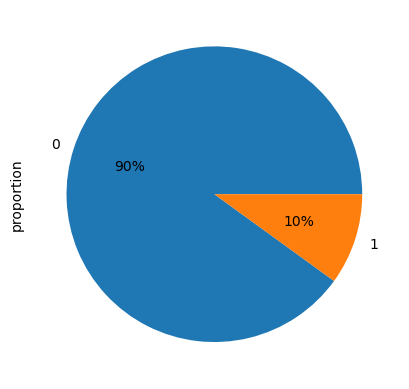

In [12]:
# Verify the unbalanced of classes with value_counts()
print(y_train.value_counts())
y_train.value_counts(normalize=True).plot(kind='pie', autopct='%.0f%%')

In [13]:
# LogisticRegression model
LR_model = LogisticRegression(
    solver='liblinear',
    class_weight='balanced', 
    max_iter=2000, 
    random_state=42
)

LR_model.fit(X_train, y_train)
predictions_valid_log = LR_model.predict_proba(X_valid)[:, 1]
auc_log = roc_auc_score(y_valid, predictions_valid_log)

# RandomForestClassifier model
RFC_model = RandomForestClassifier(
    random_state=42, 
    class_weight='balanced',
    n_estimators=200,
    n_jobs=-1
)

RFC_model.fit(X_train, y_train)
predictions_valid_forest = RFC_model.predict_proba(X_valid)[:, 1]
auc_forest = roc_auc_score(y_valid, predictions_valid_forest)

In [14]:
# Compare results
print("ROC AUC Scores:")
print("LogisticRegression model: ", auc_log)
print("RandomForestClassifier model: ", auc_forest)

ROC AUC Scores:
LogisticRegression model:  0.8581020481701205
RandomForestClassifier model:  0.8055998787565453


In [15]:
# Training final model and getting the test validations to submit
test_data.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [16]:
X_test = test_data.drop(['ID_code'], axis=1)

LR_model.fit(features, target)
predictions_test = LR_model.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    'ID_code' : test_data['ID_code'],
    'target' : predictions_test
})

submission.to_csv('submission.csv', index=False)

print("Submission preview:")
submission.head()

Submission preview:


,ID_code,target
0,test_0,0.673347
1,test_1,0.752355
2,test_2,0.296924
3,test_3,0.685601
4,test_4,0.422618
